## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [10]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [11]:
import os
import keras

# 請嘗試設定 GPU：os.environ
# 將GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [12]:
train, test = keras.datasets.cifar10.load_data()

In [13]:
## 資料前處理
"""
Your code here
"""
def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [17]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [18]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0724 15:47:22.003696  7272 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0724 15:47:22.046582  7272 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 131us/step - loss: 1.9432 - acc: 0.3004 - val_loss: 1.7525 - val_acc: 0.3707
Epoch 2/100
50000/50000 [==============================] - 6s 128us/step - loss: 1.7198 - acc: 0.3823 - val_loss: 1.6755 - val_acc: 0.4002
Epoch 3/100
50000/50000 [==============================] - 6s 126us/step - loss: 1.6234 - acc: 0.4222 - val_loss: 1.5794 - val_acc: 0.4328
Epoch 4/100
50000/50000 [==============================] - 6s 127us/step - loss: 1.5589 - acc: 0.4444 - val_loss: 1.5449 - val_acc: 0.4473
Epoch 5/100
50000/50000 [==============================] - 6s 123us/step - loss: 1.5095 - acc: 0.4628 - val_loss: 1.5136 - val_acc: 0.4619
Epoch 6/100
50000/50000 [==============================] - 7s 130us/step - loss: 1.4790 - acc: 0.4736 - val_loss: 1.5798 - val_acc: 0.4365
Epoch 7/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.4356 - acc: 0.4884 - val_loss: 1.

50000/50000 [==============================] - 6s 121us/step - loss: 0.5527 - acc: 0.8014 - val_loss: 1.9840 - val_acc: 0.5118
Epoch 60/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.5408 - acc: 0.8058 - val_loss: 1.9796 - val_acc: 0.5099
Epoch 61/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.5320 - acc: 0.8098 - val_loss: 2.0166 - val_acc: 0.5040
Epoch 62/100
50000/50000 [==============================] - 6s 121us/step - loss: 0.5393 - acc: 0.8044 - val_loss: 2.0208 - val_acc: 0.5037
Epoch 63/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.5182 - acc: 0.8155 - val_loss: 2.1083 - val_acc: 0.5024
Epoch 64/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.5086 - acc: 0.8181 - val_loss: 2.1217 - val_acc: 0.5006
Epoch 65/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.4878 - acc: 0.8253 - val_loss: 2.1281 - val_acc: 0.5015
Epoch 66/100
50000/50000 [=======

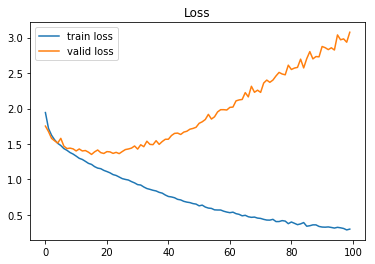

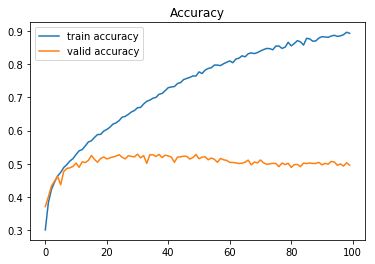

In [20]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()